<a href="https://colab.research.google.com/github/ahmadalis2016/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
# Load the dataset
df = pd.read_csv('Data/creditcard.csv')

<ipython-input-2-b3e834491da9>:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/creditcard.csv')


In [ ]:
print(df.head)

<bound method NDFrame.head of         Time        V1         V2        V3        V4        V5        V6  \
0          0 -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...        ...       ...       ...       ...       ...   
33755  37372  0.597155  -1.457940  0.648770 -1.154721 -1.384692 -0.114190   
33756  37373 -7.504323 -15.633772 -4.215051  1.507090 -5.412604  3.243205   
33757  37373  1.242547   0.010297 -1.206012  0.083576  2.171891  3.391877   
33758  37373 -1.065865   1.177477  2.083773  1.296198  0.564073  0.295974   
33759  37373 -0.302250   0.828254 -0.311542 -1.108255  2.533421  3.274040   

             V7        V8        V9  ...     

In [ ]:
print(df.describe())

               Time            V1            V2            V3            V4  \
count  33760.000000  33760.000000  33760.000000  33760.000000  33760.000000   
mean   23186.502044     -0.210769      0.090212      0.718086      0.205183   
std    12310.554703      1.849230      1.545474      1.565917      1.413512   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    11323.250000     -0.957639     -0.480557      0.248743     -0.705571   
50%    28260.500000     -0.240862      0.125560      0.834797      0.194608   
75%    33557.250000      1.162820      0.767388      1.460421      1.089341   
max    37373.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  33760.000000  33760.000000  33760.000000  33760.000000  33760.000000   
mean      -0.215343      0.092961     -0.118041      0.031774      0.285485   
std        1.397150      1.312452      1.270591    

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-null  float64
 22

In [ ]:
# Check for class imbalance
print(df['Class'].value_counts())

Class
0.0    33656
1.0      103
Name: count, dtype: int64


In [ ]:
# Scale the 'Amount' and 'Time' features

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [ ]:
from re import X
# Split data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print(y.isnull().sum())

1


In [ ]:
df = df.dropna(subset=['Class'])
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
y = y.fillna(y.mode()[0])


In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Model Selection & Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [ ]:
# Get the best model
best_rf = grid_search.best_estimator_

In [ ]:
# Train the model
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

Model Evaluation

In [ ]:
# Predict on the test set
y_pred = best_rf.predict(X_test)

In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10077     1]
 [    0 10116]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10078
         1.0       1.00      1.00      1.00     10116

    accuracy                           1.00     20194
   macro avg       1.00      1.00      1.00     20194
weighted avg       1.00      1.00      1.00     20194



In [ ]:
# ROC-AUC Score
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.9999999460514825


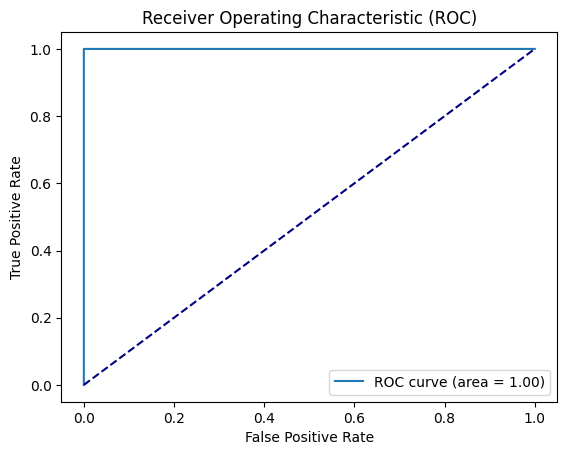

In [ ]:
# Plot ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Model Interpretation

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 12.6 MB/s eta 0:00:00


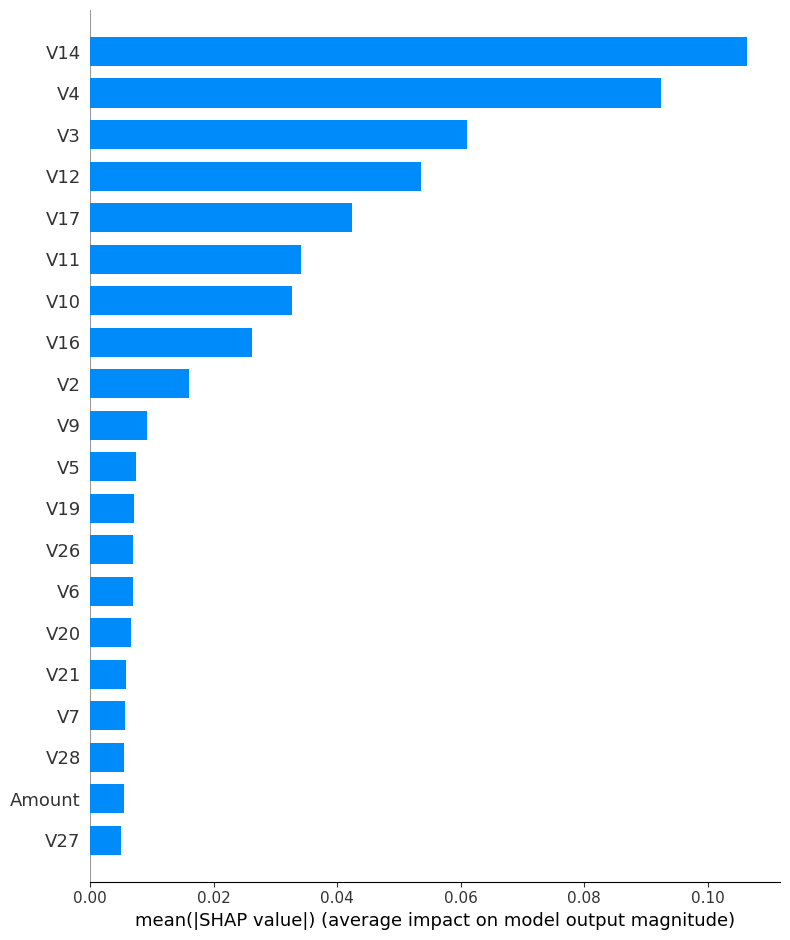

In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)



# Feature importance plot

shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")
